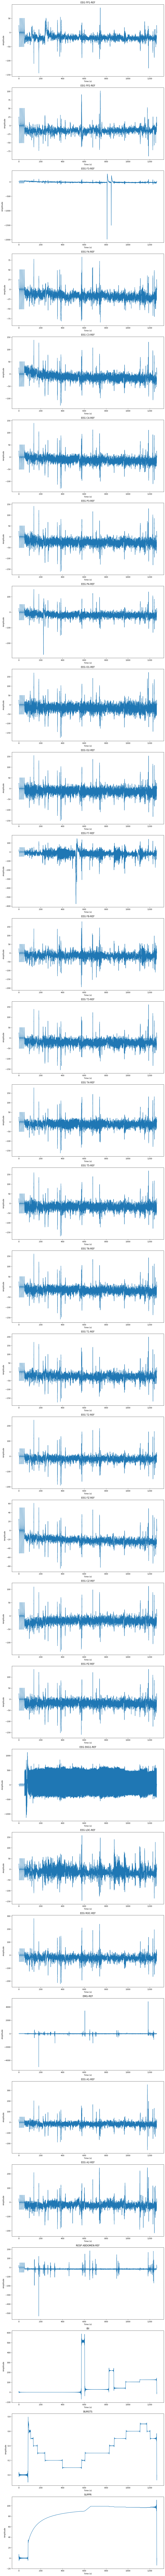

In [1]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

# 打开EDF文件
edf_file = pyedflib.EdfReader('/data/guihaokun/project/tuh_eeg/v2.0.0/edf/000/aaaaaaaa/s001_2015_12_30/01_tcp_ar/aaaaaaaa_s001_t000.edf')  


# 获取通道信息和数据
channel_labels = edf_file.getSignalLabels()
num_channels = len(channel_labels)
original_sample_rate = [edf_file.getSampleFrequency(i) for i in range(num_channels)]

# 读取原始数据
eeg_data = [edf_file.readSignal(i) for i in range(num_channels)]

# 关闭EDF文件
edf_file.close()

# 计算目标采样点数量
target_sample_rate = 200
num_samples_target = int(len(eeg_data[0]) * target_sample_rate / original_sample_rate[0])

# 重新采样到目标频率
eeg_data_resampled = np.zeros((num_channels, num_samples_target))
for i in range(num_channels):
    eeg_data_resampled[i, :] = resample(eeg_data[i], num_samples_target)

# 设置时间轴
time_resampled = np.arange(0, num_samples_target) / target_sample_rate

# 绘制每个通道的数据
plt.figure(figsize=(12, 6 * num_channels))
for i in range(num_channels):
    plt.subplot(num_channels, 1, i+1)
    plt.plot(time_resampled, eeg_data_resampled[i])
    plt.title(channel_labels[i])
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

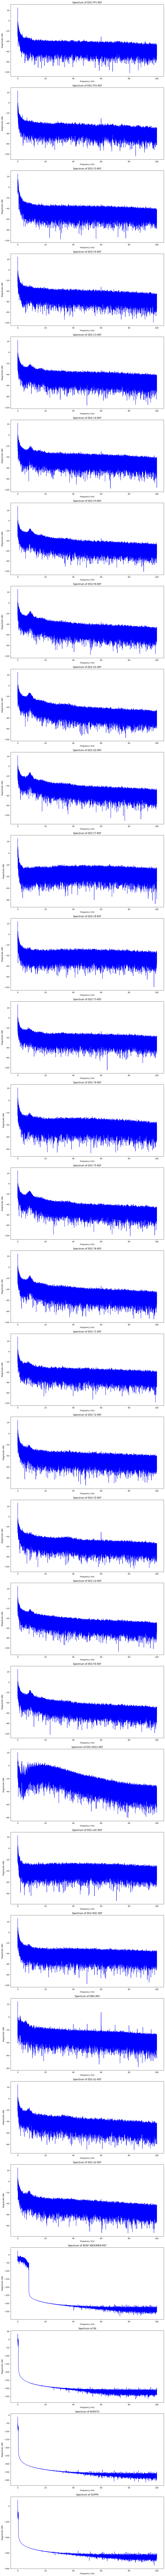

In [2]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

# 打开EEG文件并读取数据
edf_file = pyedflib.EdfReader('/data/guihaokun/project/tuh_eeg/v2.0.0/edf/000/aaaaaaaa/s001_2015_12_30/01_tcp_ar/aaaaaaaa_s001_t000.edf')

# 获取通道信息和数据
channel_labels = edf_file.getSignalLabels()
num_channels = len(channel_labels)
original_sample_rate = [edf_file.getSampleFrequency(i) for i in range(num_channels)]

# 读取原始数据
eeg_data = [edf_file.readSignal(i) for i in range(num_channels)]

# 关闭EEG文件
edf_file.close()

# 计算目标采样点数量
target_sample_rate = 200
num_samples_target = int(len(eeg_data[0]) * target_sample_rate / original_sample_rate[0])

# 重新采样到目标频率
eeg_data_resampled = np.zeros((num_channels, num_samples_target))
for i in range(num_channels):
    eeg_data_resampled[i, :] = resample(eeg_data[i], num_samples_target)

# 设置时间轴
time_resampled = np.arange(0, num_samples_target) / target_sample_rate

# 绘制每个通道的频谱图
plt.figure(figsize=(12, 6 * num_channels))
for i in range(num_channels):
    plt.subplot(num_channels, 1, i+1)
    plt.magnitude_spectrum(eeg_data_resampled[i], Fs=target_sample_rate, scale='dB', color='b')
    plt.title(f"Spectrum of {channel_labels[i]}")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')

plt.tight_layout()
plt.show()
